In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
names = ['age','workclass', 'fnlwgt', 'education','education-num', 'marital_status',
         'occupation', 'relationship', 'race', 'sex' ,'capital-gain','capital-loss',
         'hours-per-week', 'native_country','inc_class']

data = pd.read_csv("data.csv", names=names)
# Let's convert inc_class to 1 if persons income is more than 50K per year and to 0 if it's 50K or less
data['inc_class'] = [0 if x == ' <=50K' else 1 for x in data['inc_class']]
X = data[['age','workclass', 'fnlwgt', 'education','education-num', 'marital_status', 'occupation', 'relationship', 'race', 'sex' ,'capital-gain','capital-loss', 'hours-per-week', 'native_country']]
Y = data.inc_class


In [2]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: inc_class, dtype: int64

In [3]:
# there is extra spaces in string type columns se lets remove them
strings = ['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for i in strings:
    X[i] = X[i].str.strip()

/home/teemu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:

X.loc[:,'native_country'] = ["United-States" if i == "United-States" else "Other" for i in X['native_country']]

/home/teemu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
todummy_list= ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
inc_class         0
dtype: int64

In [8]:
X_dummied = pd.get_dummies(X)

In [11]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_dummied, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
test_data = pd.read_csv('test_data.csv', names=names)
test_data['inc_class'] = [0 if x == " <=50K." else 1 for x in test_data['inc_class']]
test_x = test_data[['age','workclass', 'fnlwgt', 'education','education-num', 'marital_status', 'occupation', 'relationship', 'race', 'sex' ,'capital-gain','capital-loss', 'hours-per-week', 'native_country']]
test_y = test_data.inc_class
# Data cleaning
for i in strings:
    test_x[i] = test_x[i].str.strip()
    
test_x.loc[:,'native_country'] = ["United-States" if i == "United-States" else "Other" for i in test_x['native_country']]

test_x = pd.get_dummies(test_x)


/home/teemu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/teemu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
predict = model.predict(test_x)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
auc = roc_auc_score(test_y, predict)
print(auc)

0.5553432921394057


In [16]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier(n_neighbors=2).fit(X_dummied, Y)

In [17]:
knpredict = KN.predict(test_x)

In [18]:
knauc = roc_auc_score(test_y, knpredict)
print(knauc)

0.6091257691320922


In [19]:
from sklearn.naive_bayes import GaussianNB
X_dummied.drop(columns='fnlwgt')
test_x.drop(columns='fnlwgt')
gnb = GaussianNB()
gnb.fit(X_dummied, Y)
gnbpredict = gnb.predict(test_x)



In [20]:
gnbauc = roc_auc_score(test_y, gnbpredict)
print(gnbauc)

0.6262797749545687


In [21]:
import xgboost as xgb
xgmodel = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
xgmodel = xgmodel.fit(X_dummied, Y)

In [22]:
xgpredict = xgmodel.predict(test_x)

/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
xgauc = roc_auc_score(test_y, xgpredict)
print(xgauc)

0.7941780252633507


In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy for xgmodel %.2f" % (accuracy_score(test_y, xgpredict) * 100))

Accuracy for xgmodel 87.13


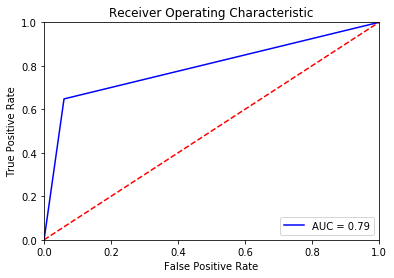

In [25]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

fpr, tpr, threshold = roc_curve(test_y, xgpredict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


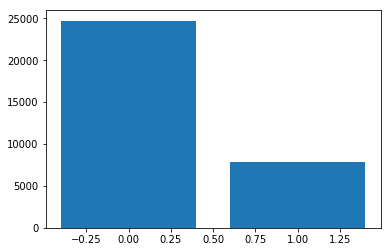

In [36]:
plt.bar(data['inc_class'].unique(),data['inc_class'].value_counts())
plt.figure( figsize=[15,6])
plt.show()
